In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import cycler
%matplotlib inline

In [2]:
pd.options.display.max_rows = 100

In [3]:
df = pd.read_csv("normal_2015-03-22-2018-07-24-Yemen.csv")

In [4]:
df.head()

data_id  iso event_id_cnty  event_id_no_cnty    event_date  year  \
0  1724093  887      YEM21934             21934  21 July 2018  2018   
1  1724095  887      YEM21936             21936  21 July 2018  2018   
2  1724097  887      YEM21938             21938  21 July 2018  2018   
3  1724098  887      YEM21939             21939  21 July 2018  2018   
4  1724099  887      YEM21940             21940  21 July 2018  2018   

   time_precision                     event_type  \
0               1                Remote violence   
1               1  Battle-No change of territory   
2               1                Remote violence   
3               1                Remote violence   
4               1                Remote violence   

                                              actor1 assoc_actor_1  ...   \
0  Military Forces of Yemen (2016-) Supreme Polit...           NaN  ...    
1                   Unidentified Armed Group (Yemen)           NaN  ...    
2  Military Forces of Yemen (2016-) Supreme Polit...           NaN  ...    
3  Military Forces of Yemen (2016-) Supreme Polit...           NaN  ...    
4                           Operation Restoring Hope           NaN  ...    

      location latitude longitude  geo_precision                   source  \
0    Ash Shajw  13.7011   44.4798              1  Asharq Alawsat (Arabic)   
1  Al Mimdarah  12.8675   45.0055              1      Aden Press; Twitter   
2  Al Hudaydah  14.7978   42.9545              2  Asharq Alawsat (Arabic)   
3  Al Khawkhah  13.8071   43.2493              1  Asharq Alawsat (Arabic)   
4        Zabid  14.1951   43.3152              1  Asharq Alawsat (Arabic)   

        source_scale                                              notes  \
0           Regional  A single civilian was reportedly killed by a H...   
1  Local-Subnational  Deputy Chief of Aden Police, Colonel Ali Al-Ka...   
2           Regional  Two civilians were killed and 14 others injure...   
3           Regional  Three civilians from a single family were kill...   
4           Regional  Saudi-led coalition airstrikes have reportedly...   

  fatalities   timestamp  iso3  
0          1  1532378006   YEM  
1          0  1532378006   YEM  
2          2  1532378006   YEM  
3          3  1532378006   YEM  
4          0  1532378006   YEM  

[5 rows x 30 columns]

In [5]:
df.dtypes

data_id               int64
iso                   int64
event_id_cnty        object
event_id_no_cnty      int64
event_date           object
year                  int64
time_precision        int64
event_type           object
actor1               object
assoc_actor_1        object
inter1                int64
actor2               object
assoc_actor_2        object
inter2                int64
interaction           int64
region               object
country              object
admin1               object
admin2               object
admin3              float64
location             object
latitude            float64
longitude           float64
geo_precision         int64
source               object
source_scale         object
notes                object
fatalities            int64
timestamp             int64
iso3                 object
dtype: object

In [6]:
df.drop_duplicates()

data_id  iso event_id_cnty  event_id_no_cnty       event_date  year  \
0      1724093  887      YEM21934             21934     21 July 2018  2018   
1      1724095  887      YEM21936             21936     21 July 2018  2018   
2      1724097  887      YEM21938             21938     21 July 2018  2018   
3      1724098  887      YEM21939             21939     21 July 2018  2018   
4      1724099  887      YEM21940             21940     21 July 2018  2018   
5      1724100  887      YEM21941             21941     21 July 2018  2018   
6      1724101  887      YEM21942             21942     21 July 2018  2018   
7      1724102  887      YEM21943             21943     21 July 2018  2018   
8      1724070  887      YEM21911             21911     20 July 2018  2018   
9      1724071  887      YEM21912             21912     20 July 2018  2018   
10     1724072  887      YEM21913             21913     20 July 2018  2018   
11     1724073  887      YEM21914             21914     20 July 2018  2018   
12     1724074  887      YEM21915             21915     20 July 2018  2018   
13     1724075  887      YEM21916             21916     20 July 2018  2018   
14     1724076  887      YEM21917             21917     20 July 2018  2018   
15     1724077  887      YEM21918             21918     20 July 2018  2018   
16     1724078  887      YEM21919             21919     20 July 2018  2018   
17     1724079  887      YEM21920             21920     20 July 2018  2018   
18     1724080  887      YEM21921             21921     20 July 2018  2018   
19     1724081  887      YEM21922             21922     20 July 2018  2018   
20     1724082  887      YEM21923             21923     20 July 2018  2018   
21     1724083  887      YEM21924             21924     20 July 2018  2018   
22     1724084  887      YEM21925             21925     20 July 2018  2018   
23     1724086  887      YEM21927             21927     20 July 2018  2018   
24     1724087  887      YEM21928             21928     20 July 2018  2018   
25     1724089  887      YEM21930             21930     20 July 2018  2018   
26     1724090  887      YEM21931             21931     20 July 2018  2018   
27     1724091  887      YEM21932             21932     20 July 2018  2018   
28     1724092  887      YEM21933             21933     20 July 2018  2018   
29     1724044  887      YEM21885             21885     19 July 2018  2018   
30     1724046  887      YEM21887             21887     19 July 2018  2018   
31     1724047  887      YEM21888             21888     19 July 2018  2018   
32     1724048  887      YEM21889             21889     19 July 2018  2018   
33     1724049  887      YEM21890             21890     19 July 2018  2018   
34     1724050  887      YEM21891             21891     19 July 2018  2018   
35     1724051  887      YEM21892             21892     19 July 2018  2018   
36     1724052  887      YEM21893             21893     19 July 2018  2018   
37     1724053  887      YEM21894             21894     19 July 2018  2018   
38     1724054  887      YEM21895             21895     19 July 2018  2018   
39     1724055  887      YEM21896             21896     19 July 2018  2018   
40     1724056  887      YEM21897             21897     19 July 2018  2018   
41     1724057  887      YEM21898             21898     19 July 2018  2018   
42     1724058  887      YEM21899             21899     19 July 2018  2018   
43     1724059  887      YEM21900             21900     19 July 2018  2018   
44     1724060  887      YEM21901             21901     19 July 2018  2018   
45     1724061  887      YEM21902             21902     19 July 2018  2018   
46     1724062  887      YEM21903             21903     19 July 2018  2018   
47     1724063  887      YEM21904             21904     19 July 2018  2018   
48     1724064  887      YEM21905             21905     19 July 2018  2018   
49     1724065  887      YEM21906             21906     19 July 2018  2018   
...        ...  ...          

In [7]:
df.fatalities.sum()

47579

In [8]:
all_fatalities = df[df['fatalities'] > 0]

In [9]:
all_fatalities.head()

data_id  iso event_id_cnty  event_id_no_cnty    event_date  year  \
0  1724093  887      YEM21934             21934  21 July 2018  2018   
2  1724097  887      YEM21938             21938  21 July 2018  2018   
3  1724098  887      YEM21939             21939  21 July 2018  2018   
5  1724100  887      YEM21941             21941  21 July 2018  2018   
7  1724102  887      YEM21943             21943  21 July 2018  2018   

   time_precision                     event_type  \
0               1                Remote violence   
2               1                Remote violence   
3               1                Remote violence   
5               1  Battle-No change of territory   
7               1                Remote violence   

                                              actor1  \
0  Military Forces of Yemen (2016-) Supreme Polit...   
2  Military Forces of Yemen (2016-) Supreme Polit...   
3  Military Forces of Yemen (2016-) Supreme Polit...   
5                   Military Forces of Yemen (2012-)   
7                           Operation Restoring Hope   

                                       assoc_actor_1  ...          location  \
0                                                NaN  ...         Ash Shajw   
2                                                NaN  ...       Al Hudaydah   
3                                                NaN  ...       Al Khawkhah   
5  Militia (Pro-Government); Operation Restoring ...  ...            Hayran   
7                                                NaN  ...   Al Qadd Alt Ali   

  latitude longitude  geo_precision                       source  \
0  13.7011   44.4798              1      Asharq Alawsat (Arabic)   
2  14.7978   42.9545              2      Asharq Alawsat (Arabic)   
3  13.8071   43.2493              1      Asharq Alawsat (Arabic)   
5  16.2712   43.1078              2      Asharq Alawsat (Arabic)   
7  16.9730   43.2255              1  Xinhua General News Service   

    source_scale                                              notes  \
0       Regional  A single civilian was reportedly killed by a H...   
2       Regional  Two civilians were killed and 14 others injure...   
3       Regional  Three civilians from a single family were kill...   
5       Regional  On Saturday morning, pro-Hadi troops reportedl...   
7  International  5 civilians (a mother and her 4 children) were...   

  fatalities   timestamp  iso3  
0          1  1532378006   YEM  
2          2  1532378006   YEM  
3          3  1532378006   YEM  
5         10  1532378006   YEM  
7          5  1532378006   YEM  

[5 rows x 30 columns]

TypeError: set_ylim() takes from 1 to 5 positional arguments but 6 were given

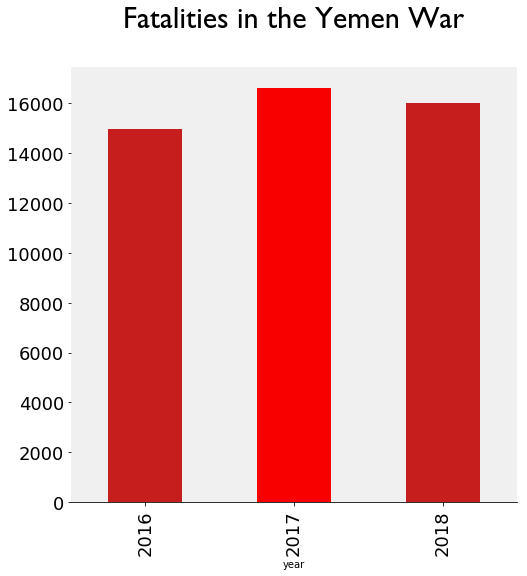

In [62]:
colours = ['#c61d1d', '#f90000', '#c61d1d']

ax = all_fatalities.groupby('year').fatalities.sum().sort_values().sort_index().plot(x='Year', y='Fatalities', kind='bar', color=colours, figsize=(8,8), width=0.5, legend=True)

ax.set_title ('Fatalities in the Yemen War', pad = 40)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

# plt.gcf().text(0.5, 0.90, "2016-2018", ha='center', fontsize=15)

#ax.set_xlabel("Year")

plt.xticks(size = 18)
plt.yticks(size = 18)

ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=True, bottom=True, grid_alpha=0.5)
ax.set_facecolor('#f0f0f0')

ax.grid(False, axis='y')
ax.set_axisbelow(False)
ax.set_ylim(0, 6000, 1000, 14000, 18000)
ax.yaxis.label.set_visible(True)
plt.show()

In [59]:
df_2 = pd.read_csv('ydp_air_raids_dataset_26_march_2015-25_march_2018.csv')

In [60]:
df_2.head()

Incident ID        Date Governorate        District  \
0            1  26/03/2015     Capital  Bani Al-Harith   
1            2  26/03/2015     Capital  Bani Al-Harith   
2            3  26/03/2015     Capital  Bani Al-Harith   
3            4  26/03/2015     Capital      Al-Sab'ein   
4            5  26/03/2015     Capital      Al-Thawrah   

                       Area                        Target  \
0                Al-Rahabah            Al-Daylami Airbase   
1                   Airport  Sana'a International Airport   
2  Al-Sonblah Neighbourhood              Residential Area   
3                Al-Nahdain           Presidential Palace   
4                Al-Nahdhah  Former 1st Armoured Division   

              Main category      Sub-category Time Air Raids Naval  \
0  Military_Security_Target     Military Site    2      unkn   NaN   
1            Infrastructure         Transport    2      unkn   NaN   
2                  Civilian  Residential Area    2      unkn   NaN   
3  Military_Security_Target     Military Site    3      unkn   NaN   
4  Military_Security_Target     Military Site    3      unkn   NaN   

   Time Interval  
0  Early-Morning  
1  Early-Morning  
2  Early-Morning  
3  Early-Morning  
4  Early-Morning

In [103]:
df_2.dtypes

Incident ID       int64
Date             object
Governorate      object
District         object
Area             object
Target           object
Main category    object
Sub-category     object
Time             object
Air Raids        object
Naval            object
Time Interval    object
year             object
dtype: object

In [114]:
df_2['year'] = df_2['Date'].str.extract('(\d\d\d\d)')

In [115]:
df_2['year'] = df_2['year'].astype('int64', inplace=True)

In [116]:
df_2.dtypes

Incident ID       int64
Date             object
Governorate      object
District         object
Area             object
Target           object
Main category    object
Sub-category     object
Time             object
Air Raids        object
Naval            object
Time Interval    object
year              int64
dtype: object

In [123]:
df_2["Date"]= pd.to_datetime(df_2['Date'], format="%d/%m/%Y")
df_2.head()

Incident ID       Date Governorate        District  \
0            1 2015-03-26     Capital  Bani Al-Harith   
1            2 2015-03-26     Capital  Bani Al-Harith   
2            3 2015-03-26     Capital  Bani Al-Harith   
3            4 2015-03-26     Capital      Al-Sab'ein   
4            5 2015-03-26     Capital      Al-Thawrah   

                       Area                        Target  \
0                Al-Rahabah            Al-Daylami Airbase   
1                   Airport  Sana'a International Airport   
2  Al-Sonblah Neighbourhood              Residential Area   
3                Al-Nahdain           Presidential Palace   
4                Al-Nahdhah  Former 1st Armoured Division   

              Main category      Sub-category Time Air Raids Naval  \
0  Military_Security_Target     Military Site    2      unkn   NaN   
1            Infrastructure         Transport    2      unkn   NaN   
2                  Civilian  Residential Area    2      unkn   NaN   
3  Military_Security_Target     Military Site    3      unkn   NaN   
4  Military_Security_Target     Military Site    3      unkn   NaN   

   Time Interval  year  
0  Early-Morning  2015  
1  Early-Morning  2015  
2  Early-Morning  2015  
3  Early-Morning  2015  
4  Early-Morning  2015

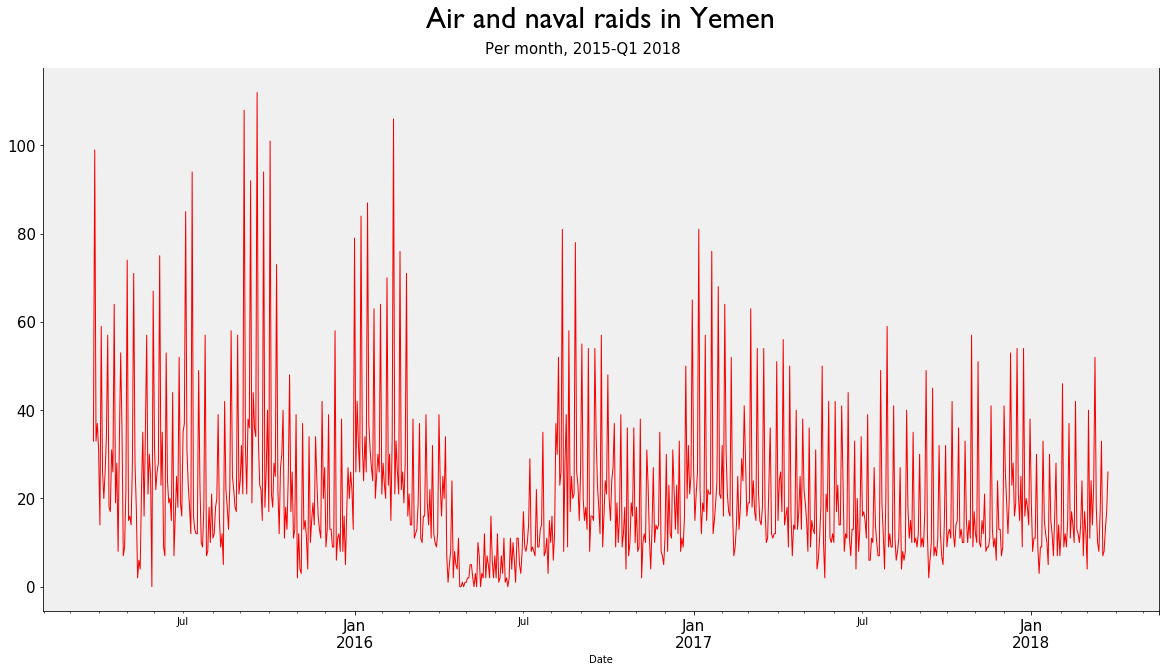

In [159]:
ax = df_2.resample('B', on='Date').count().Date.plot(kind='line', figsize=(20,10), color='#f90000', linewidth=1.0)

ax.set_title ('Air and naval raids in Yemen', pad = 40)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

ax.set_facecolor('#f0f0f0')

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.gcf().text(0.5, 0.90, "Per month, 2015-Q1 2018", ha='center', fontsize=15)

#plt.legend(bbox_to_anchor=(0, 0.98, 1., 0.), ncol=0.1,
#           mode="normal")


ax.spines['top'].set_visible(False)
#ax.set_ylim(0, 461079)
